In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Tenemos tres archivos de dataset principales:
- `Demanda laboral por tipo de vacante.xlsx`: Contiene información de Vacantes o Ofertas laborales para actividades económicas designadas por código CIUU 4 dígitos para tres meses (Julio, Agosto y Septiembre) (Sin información de Departamento y/o Municipio)
- `Demanda laboral Prueba 2.xlsx`: Contiene información de Vacantes o Ofertas laborales por municipio y Departamento para actividades económicas designadas por código CIUU 3 dígitos y CIIU 2 dígitos para tres meses (Julio, Agosto y Septiembre)
- `Oferta Laboral.xlsx`: Contiene información de Vacantes o Ofertas laborales para actividades económicas designadas por código CIUU 4 dígitos para tres meses (Julio, Agosto y Septiembre). Este dataset contiene dos informaciones discriminadas por mes y Departamento:
    - `Oferta Laboral Registrados`, y
    - `Oferta Laboral Colocados`

**La metodología es la siguiente:** dado que `Demanda laboral por tipo de vacante.xlsx` no posee información de Departamento y/o Municipio, y deseamos hacer un análisis construyendo una base de datos que contenga las ofertas por 4, 3, y 2 dígitos de CIIU, entonces requerimos colocar todo en el menor nivel de información de todos los conjuntos de datos, esto implica, que los datos de CIIU 2 y CIIU 3 deben ser agrupados por CIUU 2 y CIIU 3, respectivamente (sin distinción de Municipio y/o departamento).

Siguiendo la sugerencia para la prueba, para la reducción y el análisis de la información, se construye una base de datos usando los archivos `Demanda Laboral por tipo de vacantes` y `demanda laboral`, y se identifica cada una de las vacantes tanto en CIUO 2, 3 y 4 dígitos.

A continuación cinstruimos una función con un pequeño algoritmo que automatiza esto.

In [2]:
names4d=["nombre_sector","ciiu4d","ARS","NS","ARDC","DCS","DCN"]
dtype4d={"nombre_sector":str,"ciiu4d":int,"ARS":int,"NS":int,"ARDC":int,"DCS":int,"DCN":int}
names2d=["Mes","Cod_Dpto","Dpto","Cod_Mpio","Mpio","ciiu2d","Ofertas2d"]
dtype2d={"Mes":int,"Cod_Dpto":int,"Dpto":str,"Cod_Mpio":int,"Mpio":str,"ciiu2d":int,"Ofertas2d":int}
names3d=["Mes","Cod_Dpto","Dpto","Cod_Mpio","Mpio","ciiu3d","Ofertas3d"]
dtype3d={"Mes":int,"Cod_Dpto":int,"Dpto":str,"Cod_Mpio":int,"Mpio":str,"ciiu3d":int,"Ofertas3d":int}
names2d=["Mes","Cod_Dpto","Dpto","Cod_Mpio","Mpio","ciiu2d","Ofertas2d"]
dtype2d={"Mes":int,"Cod_Dpto":int,"Dpto":str,"Cod_Mpio":int,"Mpio":str,"ciiu2d":int,"Ofertas2d":int}
names3d=["Mes","Cod_Dpto","Dpto","Cod_Mpio","Mpio","ciiu3d","Ofertas3d"]
dtype3d={"Mes":int,"Cod_Dpto":int,"Dpto":str,"Cod_Mpio":int,"Mpio":str,"ciiu3d":int,"Ofertas3d":int}


def load_data_month(month="07"):
    dat1_4d=pd.read_excel("Demanda laboral por tipo de vacante prueba 1 (1).xlsx", engine='openpyxl', sheet_name="2020_"+month, names=names4d, converters=dtype4d)
    dat1_4d["ciiu3d"]=dat1_4d["ciiu4d"]//10
    dat1_4d["ciiu4thd"]=dat1_4d["ciiu4d"]-dat1_4d["ciiu3d"]*10
    dat1_4d["ciiu2d"]=dat1_4d["ciiu3d"]//10
    dat1_4d["Ofertas4d"]=dat1_4d["ARS"]+dat1_4d["NS"]+dat1_4d["ARDC"]+dat1_4d["DCS"]+dat1_4d["DCN"]

    if month=="07":
        Month,m="Jul",7
    if month=="08":
        Month,m="Ago",8
    if month=="09":
        Month,m="Sep",9
    
    dat1_4d["Mes"]=np.ones(len(dat1_4d),dtype=int)*m

    from collections import defaultdict
    d = defaultdict(list)
    for k, v in zip(dat1_4d["nombre_sector"], dat1_4d["ciiu4d"]):
        d[k].append(v)
    dat1_4d_i=dat1_4d[["Mes","ciiu4d","ciiu3d","ciiu2d","Ofertas4d"]]
    dat1_4d_i=dat1_4d_i.groupby(by=["Mes","ciiu4d","ciiu3d","ciiu2d"], dropna=False, as_index=False).sum()
    
    dat2_2d=pd.read_excel("Demanda laboral Prueba 2.xlsx", engine='openpyxl', sheet_name="Total_Mpio_Sect_2d_"+Month, names=names2d, converters=dtype2d)
    dat2_3d=pd.read_excel("Demanda laboral Prueba 2.xlsx", engine='openpyxl', sheet_name="Total_Mpio_Ocu_3d_"+Month, names=names3d, converters=dtype3d)
    dat2_3d["ciiu2d"]=dat2_3d["ciiu3d"]//10
    dat2_3d["ciiu3thd"]=dat2_3d["ciiu3d"]-dat2_3d["ciiu2d"]*10
    dat2_2d_i=dat2_2d.groupby(by=["Mes","ciiu2d"], dropna=False, as_index=False).sum()
    del dat2_2d_i["Cod_Dpto"]
    dat2_3d_i=dat2_3d.groupby(by=["Mes","ciiu3d"], dropna=False, as_index=False).sum()
    del dat2_3d_i["Cod_Dpto"]
    result=pd.merge(dat1_4d_i, dat2_3d_i, on=["Mes","ciiu3d"])
    result=pd.merge(result, dat2_2d_i, on=["Mes","ciiu2d"])
    result=result.sort_values(by=['ciiu4d','ciiu3d','ciiu2d'])
    return result

In [3]:
results_m7=load_data_month(month="07")
results_m8=load_data_month(month="08")
results_m9=load_data_month(month="09")

In [4]:
results_m7

,Mes,ciiu4d,ciiu3d,ciiu2d,Ofertas4d,Ofertas3d,Ofertas2d
0,7,1324.0,132.0,13.0,0,1,138
1,7,1330.0,133.0,13.0,3,5,138
2,7,1342.0,134.0,13.0,1,3,138
3,7,1349.0,134.0,13.0,1,3,138
4,7,1411.0,141.0,14.0,1,2,551
...,...,...,...,...,...,...,...
262,7,9612.0,961.0,96.0,0,7,539
263,7,9613.0,961.0,96.0,0,7,539
264,7,9621.0,962.0,96.0,810,1099,539
265,7,9622.0,962.0,96.0,61,1099,539


In [5]:
month=[]
Ofer2d,Ofer3d,Ofer4d=[],[],[]
for i,j in zip([7,8,9],[results_m7,results_m8,results_m9]):
    print(i,j["Ofertas2d"].sum(),j["Ofertas3d"].sum(),j["Ofertas4d"].sum())
    month.append(i)
    Ofer2d.append(round(j["Ofertas2d"].sum()))
    Ofer3d.append(round(j["Ofertas3d"].sum()))
    Ofer4d.append(round(j["Ofertas4d"].sum()))

7 216776 229517 47537
8 197835 208029 44313
9 197030 228056 58130


In [6]:
Ofer2d, month

([216776, 197835, 197030], [7, 8, 9])

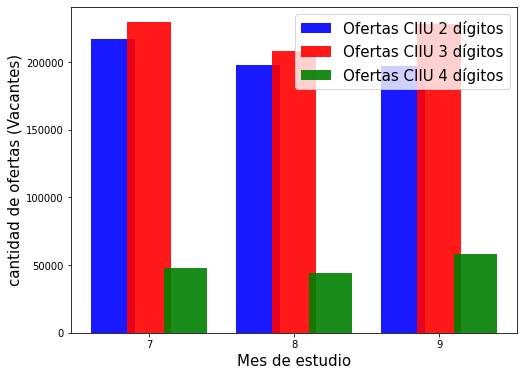

In [7]:
plt.figure(figsize=(8,6))
plt.bar(month-np.ones(3)*0.25,Ofer2d,width=0.3,color='b',alpha=0.9,label="Ofertas CIIU 2 dígitos")
plt.bar(month,Ofer3d,width=0.3,color='r',alpha=0.9,label="Ofertas CIIU 3 dígitos")
plt.bar(month+np.ones(3)*0.25,Ofer4d,color='g',width=0.3,alpha=0.9,label="Ofertas CIIU 4 dígitos")
plt.xticks(month)
plt.legend(loc='best',fontsize=15)
plt.xlabel("Mes de estudio",fontsize=15)
plt.ylabel("cantidad de ofertas (Vacantes)",fontsize=15)
plt.savefig('ciius_oferta.pdf',bbox_inches='tight')
plt.show()

para lo siguiente, vamos a identificar las actividades (basadas en el CIIU 2 dígitos) que más son demandadas en cada uno de los meses de estudio. para ello tomamos una data actualizada de la nomenclatura de estas actividades macro. Los datos han sido tomados de: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiLpJDjvqjzAhXfRTABHZKyB5oQFnoECAMQAQ&url=https%3A%2F%2Fwww.dane.gov.co%2Ffiles%2Fsen%2Fnomenclatura%2Fciiu%2FEstructuraDetalladaCIIU_4AC.xls&usg=AOvVaw2HgOy2V7ISdX0lneVawOhw

In [8]:
sectores=pd.read_csv("2digitos.csv",delimiter=",",names=["ciiu2d","nombre_sector"],converters={"ciiu2d":int,"nombre_sector":str})

In [9]:
sectores

,ciiu2d,nombre_sector
0,10,Elaboración de productos alimenticios
1,11,Elaboración de bebidas
2,12,Elaboración de productos de tabaco
3,13,Fabricación de productos textiles
4,14,Confección de prendas de vestir
...,...,...
83,5,Extracción de carbón de piedra y lignito
84,6,Extracción de petróleo crudo y gas natural
85,7,Extracción de minerales metalíferos
86,8,Extracción de otras minas y canteras


In [10]:
def reduccion2(mes="7"):
    if mes=="7":
        data_res=pd.merge(results_m7, sectores, on=["ciiu2d"])
    if mes=="8":
        data_res=pd.merge(results_m8, sectores, on=["ciiu2d"])
    if mes=="9":
        data_res=pd.merge(results_m9, sectores, on=["ciiu2d"])
    data_res=data_res[["nombre_sector","ciiu2d","Ofertas2d"]]
    data_res=data_res.groupby(by=["nombre_sector","ciiu2d"], dropna=False, as_index=False).sum()
    data_res=data_res.sort_values(by=["Ofertas2d"],ascending=False)
    data_res["Percentaje"]=data_res["Ofertas2d"]/data_res["Ofertas2d"].sum()*100
    data_res_cut=data_res[data_res["Percentaje"]>=4]
    return data_res_cut

In [11]:
data_res_cut7=reduccion2(mes="7")[0:6]
data_res_cut8=reduccion2(mes="8")[0:6]
data_res_cut9=reduccion2(mes="9")[0:6]

In [12]:
data_res_cut9

,nombre_sector,ciiu2d,Ofertas2d,Percentaje
25,"Otras actividades profesionales, científicas y...",74,32212,16.348779
23,Obras de ingeniería civil,42,27601,14.008527
1,Actividades de arquitectura e ingeniería; ensa...,71,19064,9.675684
27,Publicidad y estudios de mercado,73,18275,9.275237
17,"Fabricación de productos farmacéuticos, sustan...",21,10660,5.410344
8,Almacenamiento y actividades complementarias a...,52,10570,5.364665


Los sectores que más demanda tienen son:

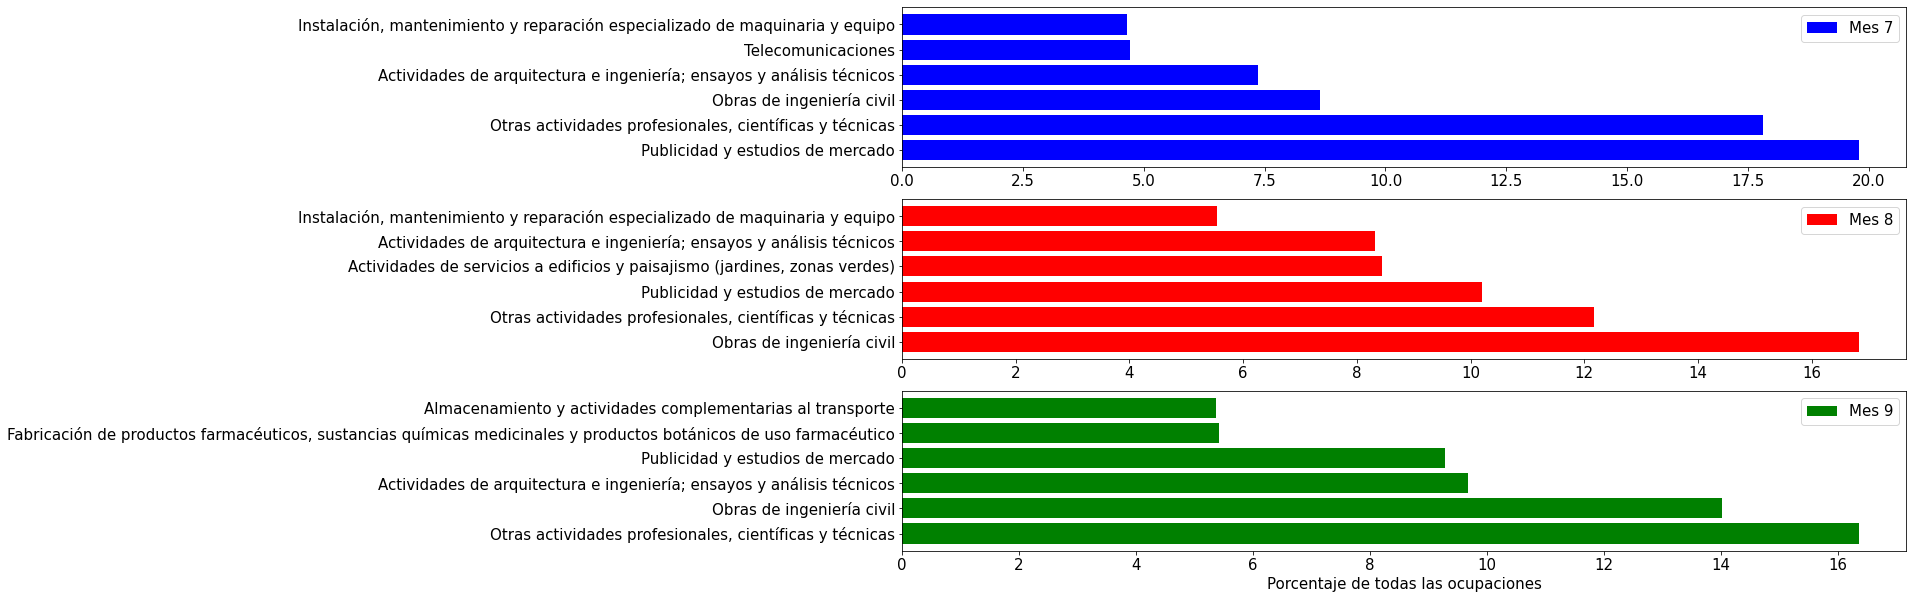

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(311)
plt.barh(data_res_cut7["nombre_sector"],data_res_cut7["Percentaje"],color='b',label="Mes 7")
#plt.xlabel("Porcentaje de todas las ocupaciones",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.subplot(312)
plt.barh(data_res_cut8["nombre_sector"],data_res_cut8["Percentaje"],color='r',label="Mes 8")
#plt.xlabel("Porcentaje de todas las ocupaciones",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.subplot(313)
plt.barh(data_res_cut9["nombre_sector"],data_res_cut9["Percentaje"],color='g',label="Mes 9")
plt.xlabel("Porcentaje de todas las ocupaciones",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('ocupaciones_mas_demandadas.pdf',bbox_inches='tight')
plt.show()

Para el análisis de la oferta laboral para registrados y colocados también hacemos una reducción de los datos tomando en cuenta el archivo:
- `Oferta Laboral Prueba 3.xlsx`

In [14]:
names1=["año","mes","pais","departamento","registrados"]
dat1=pd.read_excel("Oferta Laboral Prueba 3.xlsx", engine='openpyxl', sheet_name="Oferta Laboral Registrados", names=names1)
dat1['mes']=dat1['mes'].str.strip()
dat1=dat1.dropna()

In [15]:
names2=["año","mes","pais","departamento","rangos","ciiu2dig","division","colocados"]
dat2=pd.read_excel("Oferta Laboral Prueba 3.xlsx", engine='openpyxl', sheet_name="Oferta Laboral Colocados", names=names2)
dat2['mes']=dat2['mes'].str.strip()

In [16]:
del dat1["año"]
del dat2["año"]

In [17]:
dat1

,mes,pais,departamento,registrados
0,Julio,Colombia,ANTIOQUIA,330.0
1,Julio,Colombia,ARAUCA,2.0
2,Julio,Colombia,ATLÁNTICO,96.0
3,Julio,Colombia,"BOGOTÁ, D.C.",561.0
4,Julio,Colombia,BOLÍVAR,14.0
...,...,...,...,...
70,Septiembre,Colombia,RISARALDA,11.0
71,Septiembre,Colombia,SANTANDER,43.0
72,Septiembre,Colombia,SUCRE,2.0
73,Septiembre,Colombia,TOLIMA,9.0


In [18]:
dat2

,mes,pais,departamento,rangos,ciiu2dig,division,colocados
0,Julio,Colombia,ANTIOQUIA,Minimo - $884250,10.0,elaboración de productos alimenticios,1.0
1,Julio,Colombia,ANTIOQUIA,Minimo - $884250,45.0,"comercio, mantenimiento y reparación de vehícu...",1.0
2,Julio,Colombia,ANTIOQUIA,Minimo - $884250,72.0,investigación científica y desarrollo,1.0
3,Julio,Colombia,ANTIOQUIA,Minimo - $884250,73.0,publicidad y estudios de mercado,1.0
4,Julio,Colombia,ANTIOQUIA,Minimo - $884250,78.0,actividades de empleo,5.0
...,...,...,...,...,...,...,...
236,Septiembre,Colombia,VALLE DEL CAUCA,Minimo - $884250,20.0,fabricación de sustancias y productos químicos,1.0
237,Septiembre,Colombia,VALLE DEL CAUCA,Minimo - $884250,71.0,actividades de arquitectura e ingeniería;\nens...,1.0
238,Septiembre,Colombia,VALLE DEL CAUCA,Minimo - $884250,73.0,publicidad y estudios de mercado,3.0
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
list(set(dat2["pais"]))

[nan, 'Colombia', 'Venezuela']

In [20]:
rango_min=dat2["rangos"].str.rsplit(expand=True)[0]
rango_max=dat2["rangos"].str.rsplit(expand=True)[2]

In [21]:
rango_min=rango_min.replace("Minimo",884250)
rango_max=pd.to_numeric(rango_max.str.rsplit("$",expand=True)[1])
rango_min=pd.to_numeric(rango_min.str.rsplit("$",expand=True)[1])

In [22]:
dat2["rango_min"]=np.array(rango_min)
dat2["rango_max"]=np.array(rango_max)

In [23]:
del dat2["rangos"]

In [24]:
dat1

,mes,pais,departamento,registrados
0,Julio,Colombia,ANTIOQUIA,330.0
1,Julio,Colombia,ARAUCA,2.0
2,Julio,Colombia,ATLÁNTICO,96.0
3,Julio,Colombia,"BOGOTÁ, D.C.",561.0
4,Julio,Colombia,BOLÍVAR,14.0
...,...,...,...,...
70,Septiembre,Colombia,RISARALDA,11.0
71,Septiembre,Colombia,SANTANDER,43.0
72,Septiembre,Colombia,SUCRE,2.0
73,Septiembre,Colombia,TOLIMA,9.0


In [25]:
dat2

,mes,pais,departamento,ciiu2dig,division,colocados,rango_min,rango_max
0,Julio,Colombia,ANTIOQUIA,10.0,elaboración de productos alimenticios,1.0,NaN,884250.0
1,Julio,Colombia,ANTIOQUIA,45.0,"comercio, mantenimiento y reparación de vehícu...",1.0,NaN,884250.0
2,Julio,Colombia,ANTIOQUIA,72.0,investigación científica y desarrollo,1.0,NaN,884250.0
3,Julio,Colombia,ANTIOQUIA,73.0,publicidad y estudios de mercado,1.0,NaN,884250.0
4,Julio,Colombia,ANTIOQUIA,78.0,actividades de empleo,5.0,NaN,884250.0
...,...,...,...,...,...,...,...,...
236,Septiembre,Colombia,VALLE DEL CAUCA,20.0,fabricación de sustancias y productos químicos,1.0,NaN,884250.0
237,Septiembre,Colombia,VALLE DEL CAUCA,71.0,actividades de arquitectura e ingeniería;\nens...,1.0,NaN,884250.0
238,Septiembre,Colombia,VALLE DEL CAUCA,73.0,publicidad y estudios de mercado,3.0,NaN,884250.0
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
dat2_i=dat2.groupby(by=["mes","pais","departamento"], dropna=True, as_index=False).sum()
dat2_j=dat2.groupby(by=["mes","pais","departamento"], dropna=True, as_index=False).min()
dat2_k=dat2.groupby(by=["mes","pais","departamento"], dropna=True, as_index=False).max()

In [27]:
dat2_i=dat2_i[["mes","pais","departamento","colocados"]]
dat2_j=dat2_j[["mes","pais","departamento","rango_min"]]
dat2_k=dat2_k[["mes","pais","departamento","rango_max"]]

In [28]:
dat2_kk=pd.merge(dat2_i,dat2_j)
dat2_kkk=pd.merge(dat2_kk,dat2_k)
dat2_kkk['mes']=dat2_kkk['mes'].str.strip()

In [29]:
pd.merge(dat1[dat1["mes"]=="Septiembre"], dat2_kkk[dat2_kkk["mes"]=="Septiembre"])

,mes,pais,departamento,registrados,colocados,rango_min,rango_max
0,Septiembre,Colombia,ANTIOQUIA,376.0,53.0,1500001.0,2000000.0
1,Septiembre,Colombia,ARAUCA,7.0,4.0,1500001.0,2000000.0
2,Septiembre,Colombia,ATLÁNTICO,114.0,17.0,NaN,884250.0
3,Septiembre,Colombia,"BOGOTÁ, D.C.",508.0,59.0,3000001.0,12000000.0
4,Septiembre,Colombia,BOLÍVAR,47.0,1.0,1500001.0,2000000.0
5,Septiembre,Colombia,CASANARE,2.0,1.0,NaN,884250.0
6,Septiembre,Colombia,CAUCA,4.0,1.0,NaN,884250.0
7,Septiembre,Colombia,CESAR,6.0,1.0,1500001.0,2000000.0
8,Septiembre,Colombia,CUNDINAMARCA,77.0,38.0,NaN,884250.0
9,Septiembre,Colombia,HUILA,1.0,1.0,NaN,884250.0


In [30]:
dat_final=pd.merge(dat1, dat2_kkk)

In [31]:
dat_final

,mes,pais,departamento,registrados,colocados,rango_min,rango_max
0,Julio,Colombia,ANTIOQUIA,330.0,47.0,1500001.0,2000000.0
1,Julio,Colombia,ARAUCA,2.0,7.0,1500001.0,4000000.0
2,Julio,Colombia,ATLÁNTICO,96.0,15.0,NaN,884250.0
3,Julio,Colombia,"BOGOTÁ, D.C.",561.0,47.0,NaN,884250.0
4,Julio,Colombia,BOLÍVAR,14.0,1.0,1500001.0,2000000.0
5,Julio,Colombia,BOYACÁ,6.0,1.0,NaN,884250.0
6,Julio,Colombia,CASANARE,9.0,1.0,NaN,884250.0
7,Julio,Colombia,CUNDINAMARCA,89.0,18.0,NaN,884250.0
8,Julio,Colombia,META,15.0,2.0,1500001.0,2000000.0
9,Julio,Colombia,NORTE DE SANTANDER,25.0,4.0,1500001.0,2000000.0


In [32]:
dat_final_julio=dat_final[dat_final["mes"]=="Julio"]
dat_final_agosto=dat_final[dat_final["mes"]=="Agosto"]
dat_final_septiembre=dat_final[dat_final["mes"]=="Septiembre"]

In [33]:
dat_final_julio=dat_final_julio[dat_final_julio["colocados"]/dat_final_julio["registrados"]*100<100]
dat_final_agosto=dat_final_agosto[dat_final_agosto["colocados"]/dat_final_agosto["registrados"]*100<100]
dat_final_septiembre=dat_final_septiembre[dat_final_septiembre["colocados"]/dat_final_septiembre["registrados"]*100<100]

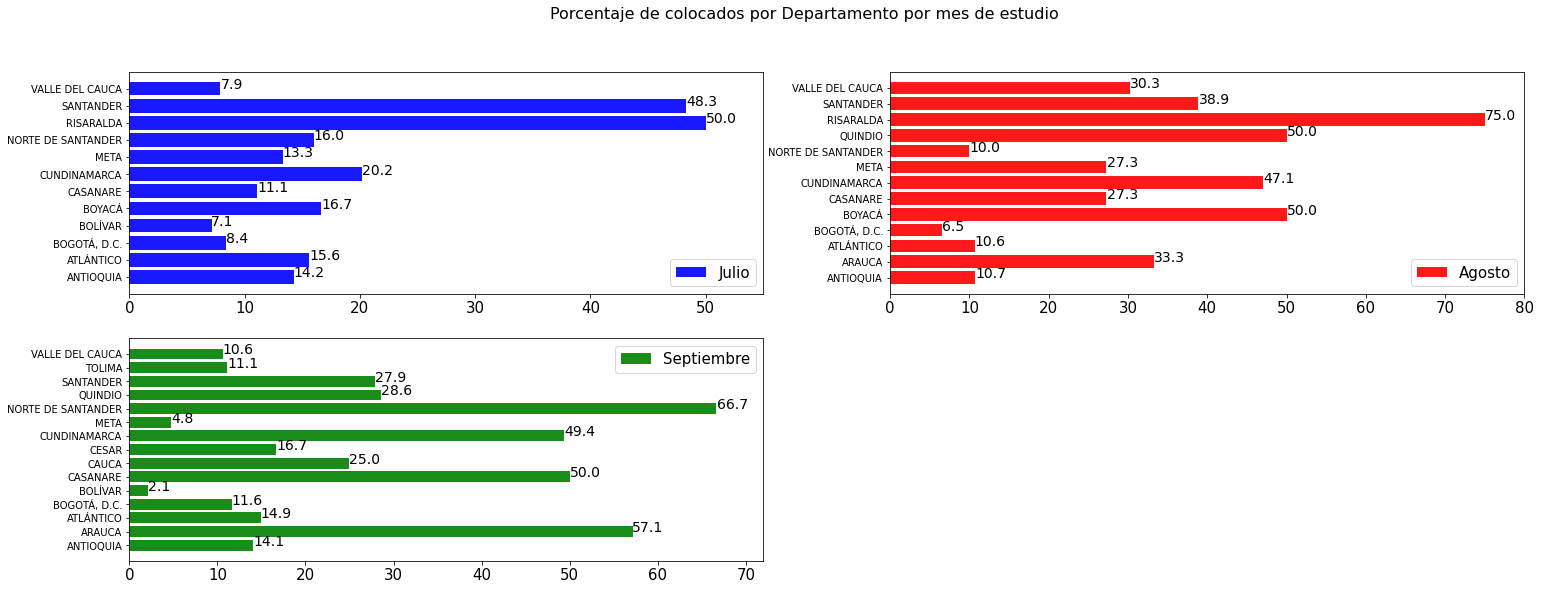

In [34]:
fig=plt.figure(figsize=(25,9))
fig.suptitle("Porcentaje de colocados por Departamento por mes de estudio",fontsize=16)
plt.subplot(221)
bar1 = plt.barh(dat_final_julio["departamento"],dat_final_julio["colocados"]/dat_final_julio["registrados"]*100,label="Julio",alpha=0.9,color='b')
for i, v in enumerate(round(dat_final_julio["colocados"]/dat_final_julio["registrados"]*100,1)):
    plt.text(v, i, str(v),fontsize=14)
plt.xlim(0,55)
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
plt.subplot(222)
bar2=plt.barh(dat_final_agosto["departamento"],dat_final_agosto["colocados"]/dat_final_agosto["registrados"]*100,label="Agosto",alpha=0.9,color='r')
for i, v in enumerate(round(dat_final_agosto["colocados"]/dat_final_agosto["registrados"]*100,1)):
    plt.text(v, i, str(v),fontsize=14)
plt.xlim(0,80)
plt.xticks(fontsize=15)
plt.legend(fontsize=15,loc=4)
plt.subplot(223)
bar3=plt.barh(dat_final_septiembre["departamento"],dat_final_septiembre["colocados"]/dat_final_septiembre["registrados"]*100,label="Septiembre",alpha=0.9,color='g')
for i, v in enumerate(round(dat_final_septiembre["colocados"]/dat_final_septiembre["registrados"]*100,1)):
    plt.text(v, i, str(v),fontsize=14)
plt.xlim(0,72)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('porcentaje_colocados.pdf',bbox_inches='tight')
plt.show()

In [35]:
with pd.ExcelWriter('output.xlsx') as writer:  
    results_m7.to_excel(writer, sheet_name='Jul Todas las ocupaciones 2, 3, 4') 
    results_m8.to_excel(writer, sheet_name='Ago Todas las ocupaciones 2, 3, 4') 
    results_m9.to_excel(writer, sheet_name='Sep Todas las ocupaciones 2, 3, 4') 
    dat_final.to_excel(writer, sheet_name='colocados vs registrados meses 7, 8, 9') 

/usr/local/lib/python3.8/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
